#### Add Libraries and Read Data

In [21]:
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [62]:
bk_data=pd.read_feather('data/bk_customer_segmentation.feather')

In [66]:
tk_data=pd.read_feather('data/tk_customer_segmentation.feather')

#### Analyze Data

We aim to improve speed of data-oriented web app by creating views using this Jupyter Notebook. Also, this notebook is going to provide us to opportunity of discovering insight into data by diving analysis into chunks.

> Transaction Records over Date

The dataset contains check records from 2018 year. Its interval can be defined as from the first day of 2018 to end of November 2018

In [80]:
bk_transact_date=bk_data[['ID','ISLEM_TARIHI','SIRKET_TURU']]   # get necessary columns from G type customers
tk_transact_date=tk_data[['ID','ISLEM_TARIHI','SIRKET_TURU']]   # get necessary columns from T type customers

transact_date=pd.concat([bk_transact_date,tk_transact_date],axis=0)     # union of two dataframes
transact_date.reset_index(drop=True,inplace=True)                       # reset index to save to feather

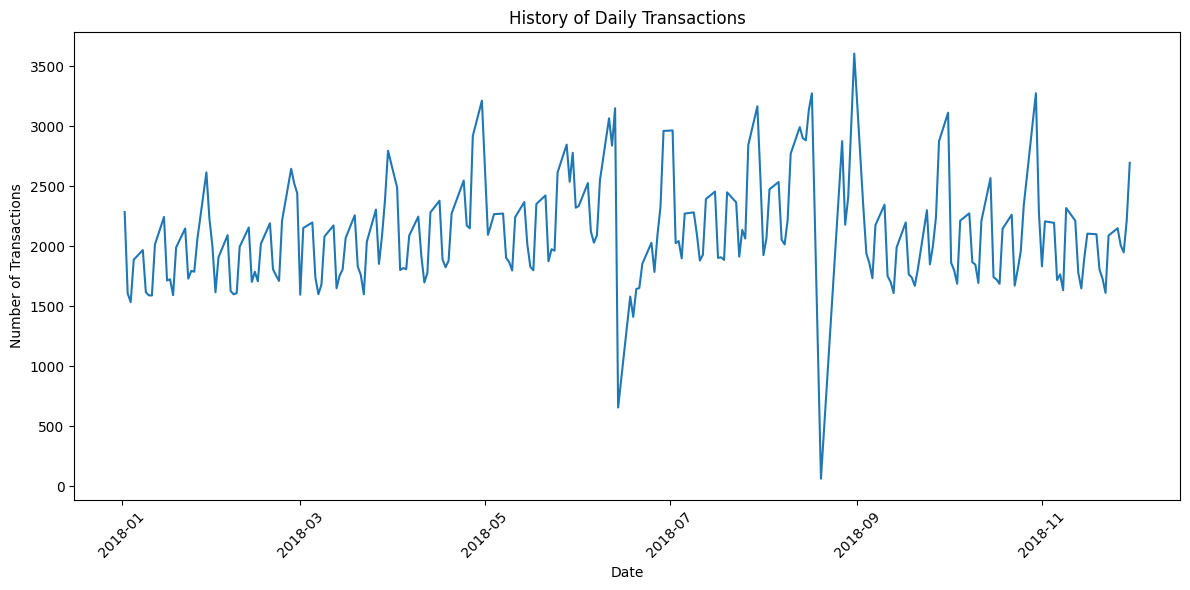

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(transact_date.groupby('ISLEM_TARIHI')['ID'].count().reset_index()['ISLEM_TARIHI'],
    transact_date.groupby('ISLEM_TARIHI')['ID'].count().reset_index()['ID'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('History of Daily Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
# save the view into a feather file
transact_date.to_feather('streamlit_view/transaction_history.feather')

> Distribution of Company Type over Dataframe

Using **SIRKET_TURU** to see distribution

In [87]:
bk_company_type = bk_data[['MUSTERI_ID','SIRKET_TURU']]   # get necessary columns from G type customers
tk_company_type = tk_data[['MUSTERI_ID','SIRKET_TURU']]   # get necessary columns from T type customers

In [ ]:
# keep MUSTERI_ID unique by dropping duplicates
bk_company_type.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
tk_company_type.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)

In [91]:
company_type=pd.concat([bk_company_type,tk_company_type],axis=0)     # union of two dataframes
company_type.reset_index(drop=True,inplace=True)

In [94]:
# see the distribution of company types in the dataset by donut chart
# get the count of each company type by SIRKET_TURU column
company_type_count=company_type.groupby('SIRKET_TURU')['MUSTERI_ID'].count().reset_index()

In [93]:
# save the view into a feather file
company_type.to_feather('streamlit_view/company_type_distribution.feather')

> Use of Checks over Dataset

Using **KULLANDIRIM** to see distribution